In [11]:
import time
import numpy
import pandas
pandas.set_option('display.max_colwidth', 0)
import collections

from IPython import display

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
from matplotlib import pyplot

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")

,Questions,Discussion
0,Quel est l'impact de la disposition des données dans l'espace?,Impact de la disposition des données dans l'espace:
1,Quel est le K optimal?,Valeur de k optimale?:


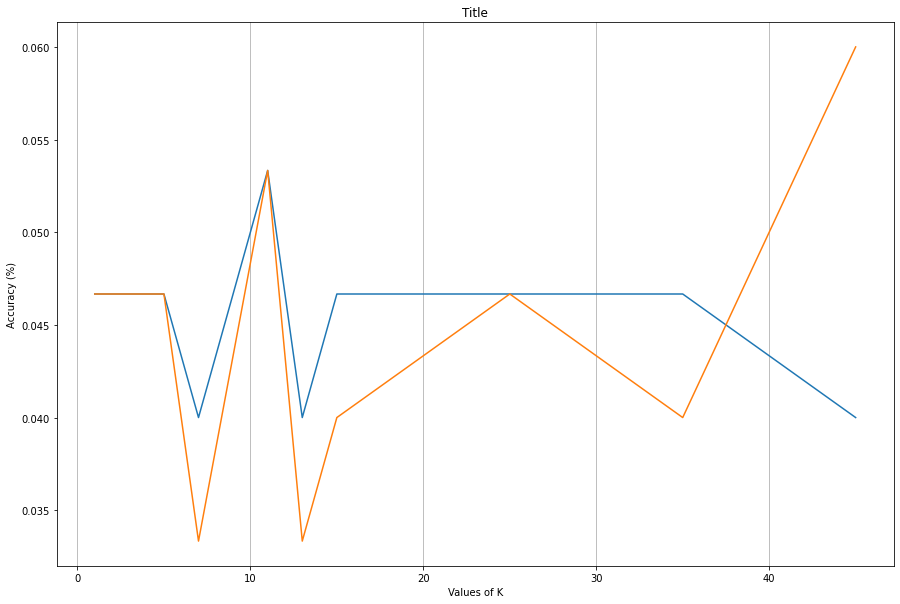

In [12]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3A = 15

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3A ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!
X,y = load_iris(return_X_y=True)

X = minmax_scale(X)

k_test = [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et 
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and 
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []
# ******

for k in k_test:
    classifier_uniform = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    classifier_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    leave_on_out = LeaveOneOut()

    err_total_clf_uniform = []
    err_total_clf_distant = []

    for index_train, index_test in leave_on_out.split(X):
        X_train, y_train = X[index_train], y[index_train]
        X_test, y_test = X[index_test], y[index_test]

        classifier_uniform.fit(X_train, y_train)
        classifier_distance.fit(X_train, y_train)

        err_total_clf_uniform.append(1 - classifier_uniform.score(X_test, y_test)) 
        err_total_clf_distant.append(1 - classifier_distance.score(X_test, y_test))
    scoresUniformWeights.append(numpy.mean(err_total_clf_uniform))
    scoresDistanceWeights.append(numpy.mean(err_total_clf_distant))

_times.append(time.time())
checkTime(TMAX_Q3A, "Q3A")

# *** TODO Q3A ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")
# ******
# *** TODO Q3A ***
ax.plot(k_test, scoresDistanceWeights, label="Distance weights")
ax.plot(k_test, scoresUniformWeights, label="Uniform weights")


fig.add_subplot(ax)
# Répondez aux quelques questions pour la discussion 
# Answer a few questions for discussion 

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "Impact de la disposition \
          des données dans l'espace: "
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = "Valeur de k optimale?: \
          "
results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)

,Questions,Discussion
0,Quel est l'impact de la disposition des données dans l'espace?,Impact de la disposition des données dans l'espace:
1,Quel est le K optimal?,Valeur de k optimale?:


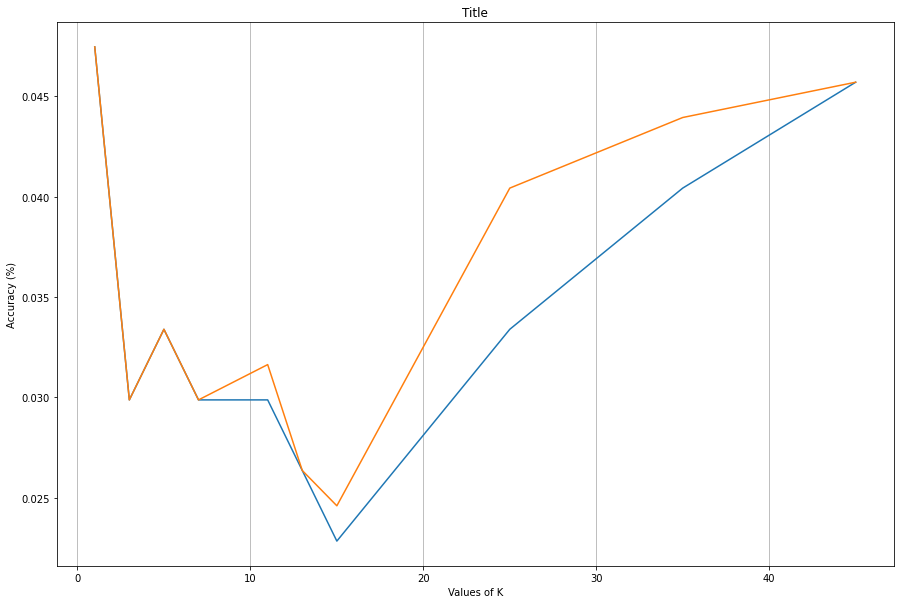

In [13]:
# Définition de la durée d'exécution maximale pour la question
# Definition of the maximum execution duration for the question
TMAX_Q3B = 260

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionary for recording the evaluated parameters
results = collections.defaultdict(list)
results['Questions'] = ["Quel est l\'impact de la disposition des données dans l'espace?",
                        "Quel est le K optimal?",
                       ]
results['Discussion'] = []

_times.append(time.time())

# *** TODO Q3B ***
# Testez un classifeur K plus proches voisins sur le jeu de données
# L'évaluation doit être faite en utilisant une approche leave-one-out
# Testez avec k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} et avec les valeurs
# "uniform" et "distance" comme valeur de l'argument "weights".
# N'oubliez pas de normaliser le jeu de données en utilisant minmax_scale!
# Test a k-nearest neighbours classifier on the dataset
# The evaluation should be done using a leave-one-out approach
# Test with k = {1, 3, 5, 7, 11, 13, 15, 25, 35, 45} and with the values
# "uniform" and "distance" as the value of the "weights" argument.
# Don't forget to normalize the dataset using minmax_scale!

# Stockez les performances obtenues (précision moyenne pour chaque valeur de k)
# dans deux listes, scoresUniformWeights pour weights=uniform et 
# scoresDistanceWeights pour weights=distance
# Le premier élément de chacune de ces listes devrait contenir la précision
# pour k=1, le second la précision pour k=3, et ainsi de suite.
# Store the obtained performances (average precision for each value of k)
# in two lists, scoresUniformWeights for weights=uniform and 
# scoresDistanceWeights for weights=distance
# The first element of each of these lists should contain the precision
# for k=1, the second the precision for k=3, and so on.
scoresUniformWeights = []
scoresDistanceWeights = []
# ******

X,y = load_breast_cancer(return_X_y=True)

X = minmax_scale(X)

k_test = [1, 3, 5, 7, 11, 13, 15, 25, 35, 45]

for k in k_test:
    classifier_uniform = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    classifier_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    leave_on_out = LeaveOneOut()

    err_total_clf_uniform = []
    err_total_clf_distant = []

    for index_train, index_test in leave_on_out.split(X):
        X_train, y_train = X[index_train], y[index_train]
        X_test, y_test = X[index_test], y[index_test]

        classifier_uniform.fit(X_train, y_train)
        classifier_distance.fit(X_train, y_train)

        err_total_clf_uniform.append(1 - classifier_uniform.score(X_test, y_test)) 
        err_total_clf_distant.append(1 - classifier_distance.score(X_test, y_test))
    scoresUniformWeights.append(numpy.mean(err_total_clf_uniform))
    scoresDistanceWeights.append(numpy.mean(err_total_clf_distant))

_times.append(time.time())
checkTime(TMAX_Q3B, "Q3B")

# *** TODO Q3B ***
# Produisez un graphique contenant deux courbes, l'une pour weights=uniform
# et l'autre pour weights=distance. L'axe x de la figure doit être le nombre
# de voisins et l'axe y la performance en leave-one-out
# Produce a graph containing two curves, one for weights=uniform
# and the other for weights=distance. The x axis of the figure should be the number
# of neighbours and the y-axis the leave-one-out performance

fig = pyplot.figure()
ax = fig.add_subplot(111)

ax.set_title('Title')  # À modifier / to be modified
# ax.plot(X, y, 'r--', label="Distance weights") # À compléter / to be completed
# ax.plot(X, y, 'b--', label="Uniform weights")  # À compléter / to be completed
# ax.set_xticks(X, X)
ax.grid(axis='x')
ax.set_xlabel("Values of K")
ax.set_ylabel("Accuracy (%)")

# ******

# *** TODO Q3B ***
ax.plot(k_test, scoresDistanceWeights, label="Distance weights")
ax.plot(k_test, scoresUniformWeights, label="Uniform weights")


fig.add_subplot(ax)
# Répondez aux quelques questions pour la discussion 
# Answer a few questions for discussion 

# Quel est l'impact de la disposition des données dans l'espace?
# What is the impact of the layout of the data in the space?
answer = "Impact de la disposition \
          des données dans l'espace: "
results['Discussion'].append(answer)

# Quel est le nombre de voisins $k$ optimal à utiliser?
# What is the optimal number of $k$ neighbors to use?
answer = "Valeur de k optimale?: \
          "
results['Discussion'].append(answer)
# ******

# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)